In [ ]:
%load_ext autoreload
%autoreload 2

# %matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from rich import print
import rich
from tpvalidator.utilities import temporary_log_level, pandas_backend
import tpvalidator.workspace as workspace
import logging
import tpvalidator.analyzers.snn as snn

figsize = (15,15)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# By Jake VanderPlas
# License: BSD-style


def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)


ni_py_spec_30 = discrete_cmap(30, 'nipy_spectral')

/var/folders/dw/sj94s2457kl2gkb829ty4_cc0000gn/T/ipykernel_37493/3328834999.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base = plt.cm.get_cmap(base_cmap)


In [6]:

ws=None
with temporary_log_level(workspace.TriggerPrimitivesWorkspace._log, logging.INFO):
    ws = workspace.TriggerPrimitivesWorkspace("../data/vd/bkg/100events/tptree_st_tpg_vd_radiols.root")


In [7]:
mckey_bins = range(-1, len(ws.info['mc_generator_labels'])+1)

print(ws.info)
from rich.table import Table

t = Table()
t.add_column('key')
t.add_column('label')

for k,l in enumerate(ws.info['mc_generator_labels']):
    t.add_row(str(k), l)
print(t)

{
    'geo': {'detector': 'dunevd10kt_3view_30deg_v5_refactored_1x8x6ref'},
    'mc_generator_labels': [
        'CavernNGammasAtLAr1x8x6',
        'Rn222ChainBi214GenInLAr',
        'Rn222ChainFromBi214GenInUpperMesh1x8x6',
        'Th232ChainGenInAnode',
        'CavernwallGammasAtLAr1x8x6',
        'Rn222ChainFromPb210GenInUpperMesh1x8x6',
        'Rn222ChainFromPb214GenInUpperMesh1x8x6',
        'Rn222ChainPo218GenInLAr',
        'Rn222ChainPb214GenInLAr',
        'Ar39GenInLAr',
        'Rn222ChainPb210GenInLAr',
        'Rn222ChainFromPo218GenInUpperMesh1x8x6',
        'Rn222ChainFromBi210GenInUpperMesh1x8x6',
        'Ar42GenInLAr',
        'Rn222ChainGenInPDS',
        'K42From42ArGenInLAr',
        'Rn220ChainPb212GenInLAr',
        'CavernwallNeutronsAtLAr1x8x6',
        'K40GenInAnode',
        'U238ChainGenInCathode',
        'Rn222ChainRn222GenInLAr',
        'Th232ChainGenInCathode',
        'K42From42ArGenInUpperMesh1x8x6',
        'foamGammasAtLAr1x8x6',
        'K40GenInCathode',
        'U238ChainGenInAnode',
        'Kr85GenInLAr',
        'CryostatNGammasAtLAr1x8x6',
        'Rn220ChainFromPb212GenInUpperMesh1x8x6'
    ],
    'tpg': {
        'threshold_tpg_plane0': 38,
        'threshold_tpg_plane1': 38,
        'threshold_tpg_plane2': 44,
        'tool': 'TPAlgTPCSimpleThreshold'
    },
    'tptree': {'U_window_offset': 8, 'V_window_offset': 1, 'X_window_offset': -7}
}

┏━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ key ┃ label                                  ┃
┡━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ 0   │ CavernNGammasAtLAr1x8x6                │
│ 1   │ Rn222ChainBi214GenInLAr                │
│ 2   │ Rn222ChainFromBi214GenInUpperMesh1x8x6 │
│ 3   │ Th232ChainGenInAnode                   │
│ 4   │ CavernwallGammasAtLAr1x8x6             │
│ 5   │ Rn222ChainFromPb210GenInUpperMesh1x8x6 │
│ 6   │ Rn222ChainFromPb214GenInUpperMesh1x8x6 │
│ 7   │ Rn222ChainPo218GenInLAr                │
│ 8   │ Rn222ChainPb214GenInLAr                │
│ 9   │ Ar39GenInLAr                           │
│ 10  │ Rn222ChainPb210GenInLAr                │
│ 11  │ Rn222ChainFromPo218GenInUpperMesh1x8x6 │
│ 12  │ Rn222ChainFromBi210GenInUpperMesh1x8x6 │
│ 13  │ Ar42GenInLAr                           │
│ 14  │ Rn222ChainGenInPDS                     │
│ 15  │ K42From42ArGenInLAr                    │
│ 16  │ Rn220ChainPb212GenInLAr                │
│ 17  │ CavernwallNeutronsAtLAr1x8x6           │
│ 18  │ K40GenInAnode                          │
│ 19  │ U238ChainGenInCathode                  │
│ 20  │ Rn222ChainRn222GenInLAr                │
│ 21  │ Th232ChainGenInCathode                 │
│ 22  │ K42From42ArGenInUpperMesh1x8x6         │
│ 23  │ foamGammasAtLAr1x8x6                   │
│ 24  │ K40GenInCathode                        │
│ 25  │ U238ChainGenInAnode                    │
│ 26  │ Kr85GenInLAr                           │
│ 27  │ CryostatNGammasAtLAr1x8x6              │
│ 28  │ Rn220ChainFromPb212GenInUpperMesh1x8x6 │
└─────┴────────────────────────────────────────┘

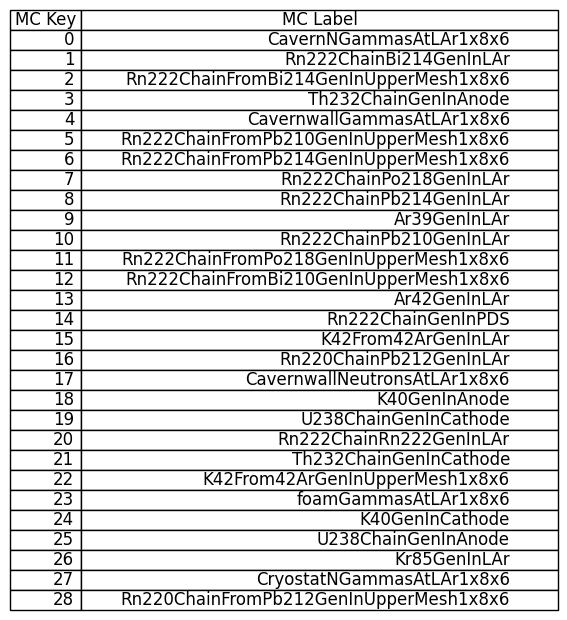

In [63]:
import matplotlib.pyplot as plt

def plot_mc_list(info, ax, font_size=12):
    columns = (["MC Key", "MC Label"])
    cell_text = [[str(k), l] for k,l in enumerate(info['mc_generator_labels'])]
    ax.axis("off")  # hide main axes
    table = ax.table(
        cellText=cell_text,
        # rowLabels=rows,
        colLabels=columns,
        colWidths=[.12,.8],

        loc="center"
    )

    table.auto_set_font_size(False)
    table.set_fontsize(font_size)
    table.scale(1.2, 1.2)  # scale x, y

# # Data for the table
# columns = (["MC Key", "MC Label"])
# # rows = ["Row 1", "Row 2", "Row 3"]
# cell_text = [[str(k), l] for k,l in enumerate(ws.info['mc_generator_labels'])]

# fig, ax = plt.subplots()
# ax.axis("off")  # hide main axes

# table = ax.table(
#     cellText=cell_text,
#     # rowLabels=rows,
#     colLabels=columns,
#     colWidths=[.12,.8],

#     loc="center"
# )

# table.auto_set_font_size(False)
# table.set_fontsize(12)
# table.scale(1.2, 1.2)  # scale x, y

fig, ax = plt.subplots()
plot_mc_list(ws.info, ax)
plt.show()

In [64]:
sample_win_start, sample_win_end = (100, 8100)

tps = ws.tps[(ws.tps.TP_startT > sample_win_start) & (ws.tps.TP_startT < sample_win_end)]

sampling_period = 5e-6
n_ev = len(tps.event.unique())
dataset_time_sec = n_ev*(sample_win_end-sample_win_start)*sampling_period

print(n_ev, dataset_time_sec)

tp_psel = snn.TPSignalNoiseSelector(tps)


100 4.0

/var/folders/dw/sj94s2457kl2gkb829ty4_cc0000gn/T/ipykernel_37493/1138518734.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


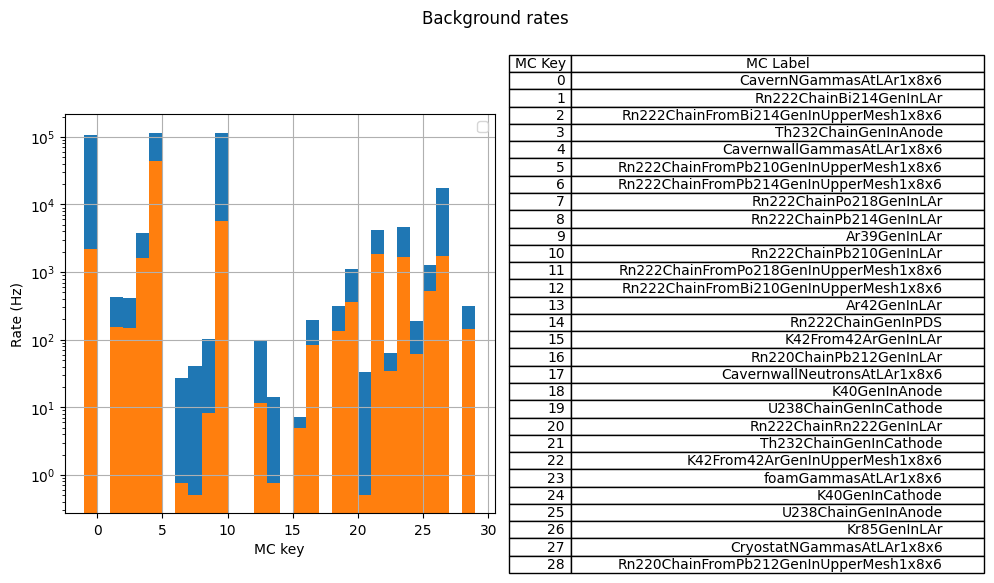

In [72]:
#len(tps.event.unique())*8000

fig, axes = plt.subplots(1,2, figsize=(10,6))
ax=axes[0]
tps.TP_mcgen_key.hist(bins=mckey_bins, weights=np.ones(len(tps))*1/dataset_time_sec, log=True, ax=ax)

df = tps.query('TP_TOT > 7')
df.TP_mcgen_key.hist(bins=mckey_bins, weights=np.ones(len(df))*1/dataset_time_sec, log=True, ax=axes[0])
ax.legend()

ax.set_xlabel('MC key')
ax.set_ylabel('Rate (Hz)')


ax=axes[1]
plot_mc_list(ws.info, ax, font_size=10)
fig.suptitle("Background rates")
fig.tight_layout()



<Axes: xlabel='TP_trueY', ylabel='TP_trueX'>

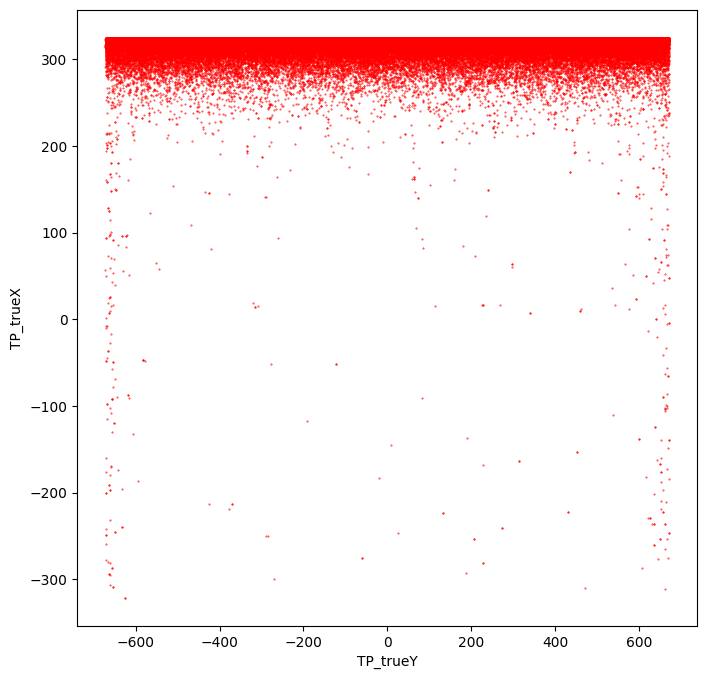

In [ ]:
# fig, axes = plt.subplots(1, 2, figsize=(10,4))
fig, axes = plt.subplots(1, 1, figsize=(8,8))

# ax = axes[0]
# tp_psel.sig_p2.query('(TP_TOT > 1) & (TP_mcgen_key==9)').plot.scatter(x='TP_trueY', y='TP_trueX',s=0.1, alpha=0.5, ax=ax)
# tp_psel.sig_p2.query('(TP_TOT > 1) & (TP_mcgen_key==4)').plot.scatter(x='TP_trueY', y='TP_trueX',s=0.1, c='orange', alpha=0.5, ax=ax)
# ax = axes[1]
# tp_psel.sig_p2.query('(TP_TOT > 7) & (TP_mcgen_key==9)').plot.scatter(x='TP_trueY', y='TP_trueX',s=0.1, alpha=0.5, ax=ax)
tp_psel.sig_p2.query('(TP_TOT > 7) & (TP_mcgen_key==4)').plot.scatter(x='TP_trueY', y='TP_trueX',s=0.2, c='red', alpha=0.8, ax=axes)
  

In [78]:
tp_ar39 = tp_psel.query('(TP_mcgen_key==9)')
tp_gmw = tp_psel.query('(TP_mcgen_key==4)')
tp_kr = tp_psel.query('(TP_mcgen_key==26)')

tpa_ar39 = snn.TPSignalNoiseAnalyzer(tp_ar39)
tpa_gmw = snn.TPSignalNoiseAnalyzer(tp_gmw)
tpa_kr = snn.TPSignalNoiseAnalyzer(tp_kr)


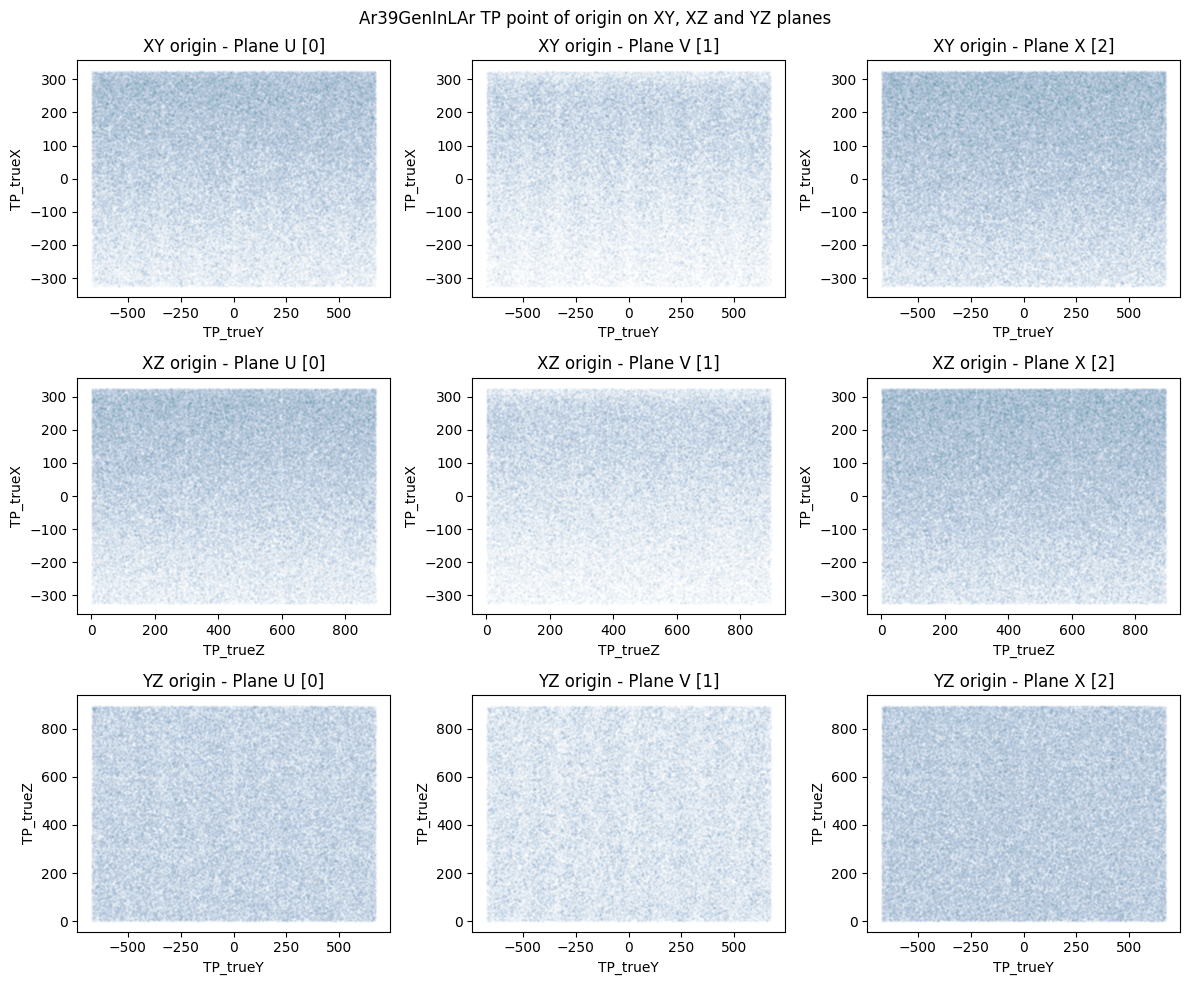

In [44]:
fig = tpa_ar39.draw_tp_sig_origin_2d_dist(ws.info['mc_generator_labels'][9])

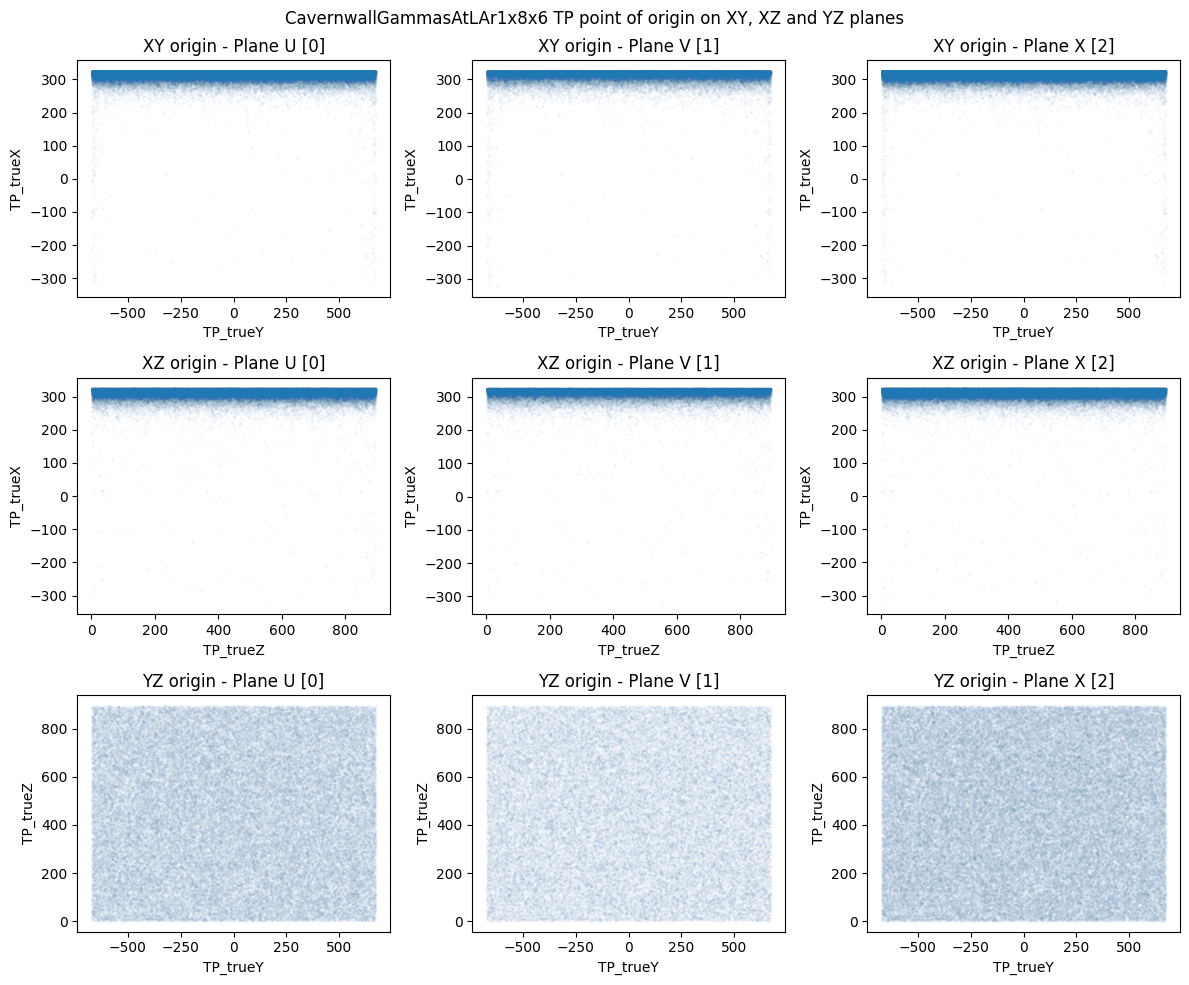

In [79]:
fig = tpa_gmw.draw_tp_sig_origin_2d_dist(ws.info['mc_generator_labels'][4])

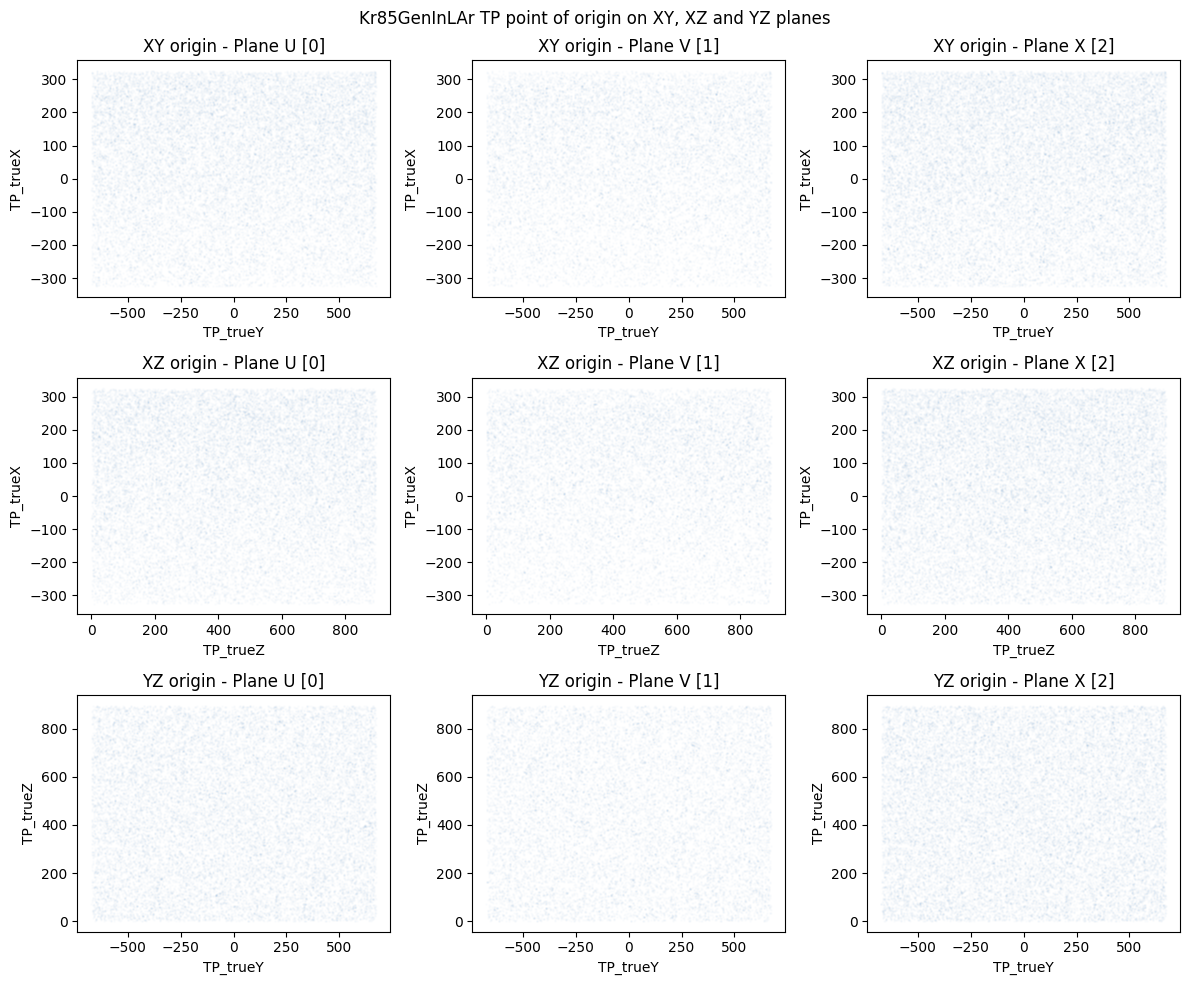

In [80]:
fig = tpa_kr.draw_tp_sig_origin_2d_dist(ws.info['mc_generator_labels'][26])

<Axes: xlabel='TP_trueZ', ylabel='TP_trueX'>

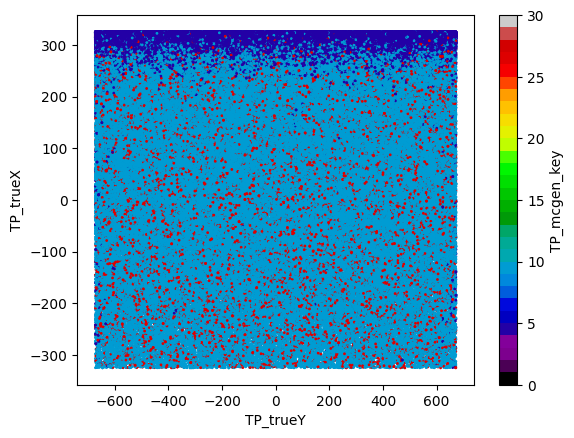

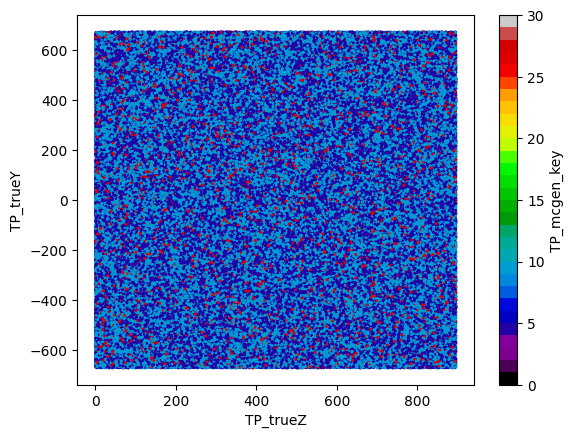

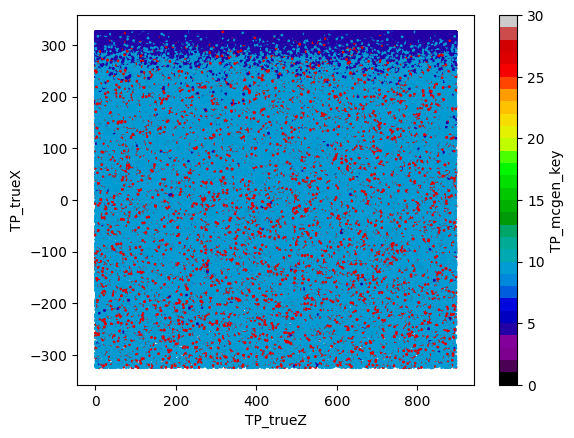

In [26]:
tps_c[(tps_c.TP_signal==1) & (tps_c.TP_mcgen_key.isin([4,9,26]))].plot.scatter(x='TP_trueY', y='TP_trueX',c='TP_mcgen_key', s=1, colormap=ni_py_spec_30, vmin=0, vmax=30)
tps_c[(tps_c.TP_signal==1) & (tps_c.TP_mcgen_key.isin([4,9,26]))].plot.scatter(x='TP_trueZ', y='TP_trueY',c='TP_mcgen_key', s=1, colormap=ni_py_spec_30, vmin=0, vmax=30)
tps_c[(tps_c.TP_signal==1) & (tps_c.TP_mcgen_key.isin([4,9,26]))].plot.scatter(x='TP_trueZ', y='TP_trueX',c='TP_mcgen_key', s=1, colormap=ni_py_spec_30, vmin=0, vmax=30)

<Axes: xlabel='TP_trueZ', ylabel='TP_trueX'>

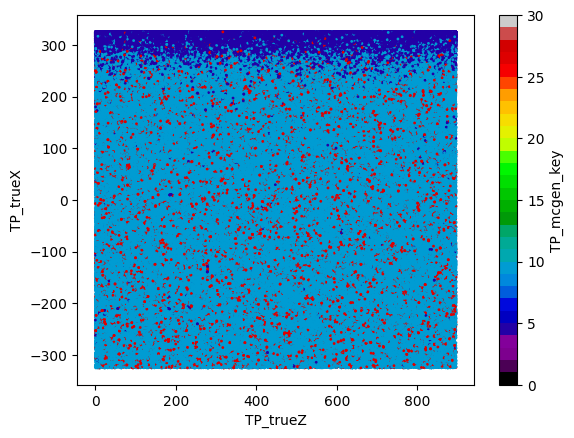

In [19]:
tps_c[(tps_c.TP_signal==1) & (tps_c.TP_mcgen_key.isin([4,9,26]))].plot.scatter(x='TP_trueZ', y='TP_trueX',c='TP_mcgen_key', s=1, colormap=ni_py_spec_30, vmin=0, vmax=30)

<Axes: xlabel='TP_trueZ', ylabel='TP_trueX'>

Exception ignored in: <function TriggerPrimitivesWorkspace.__del__ at 0x119368cc0>
Traceback (most recent call last):
  File "/Users/ale/Development/dune/trigger-studies/tpvalidator/src/tpvalidator/workspace.py", line 57, in __del__
    del self.tree
AttributeError: 'TriggerPrimitivesWorkspace' object has no attribute 'tree'


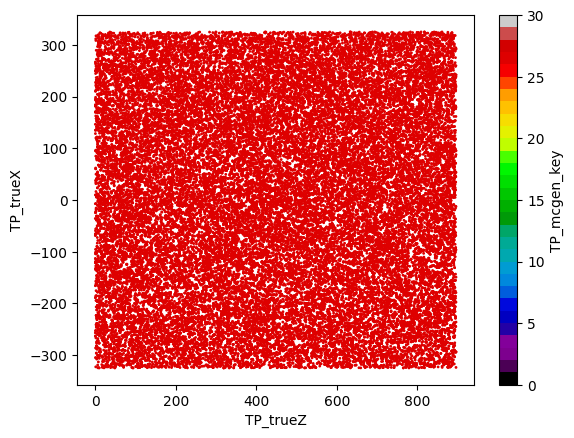

In [21]:
tps_c[(tps_c.TP_signal==1) & (tps_c.TP_mcgen_key.isin([26]))].plot.scatter(x='TP_trueZ', y='TP_trueX',c='TP_mcgen_key', s=1, colormap=ni_py_spec_30, vmin=0, vmax=30)

In [ ]:
import plotly.express as px
with pandas_backend('plotly') as x:

    df = ws.ides.query('mcgen_key == 4')
    f = px.density_heatmap(df, x="x", y="y", range_color=(0, 1000), width=800, height=800)
    f.show()

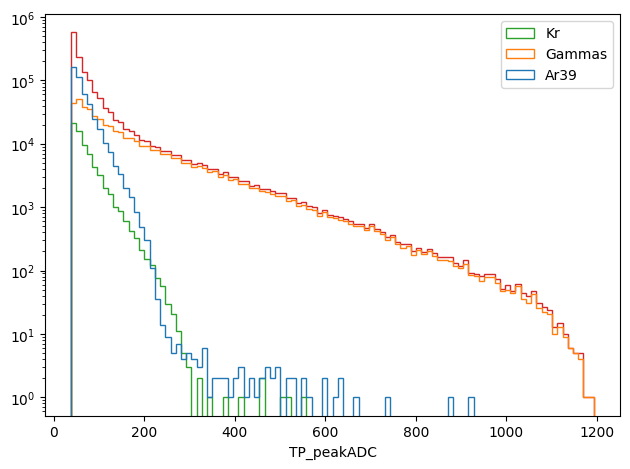

In [123]:
fig, ax = plt.subplots(1,1)
# tps_c[tps_c.TP_mcgen_id == 4].TP_SADC.hist(bins=100)
# tps_c[tps_c.TP_mcgen_id == 9].TP_SADC.hist(bins=100)
# tps_c[tps_c.TP_mcgen_id == 26].TP_SADC.hist(bins=100)

var = 'TP_TOT'
bins= bins=[b for b in range(25)]

var = 'TP_peakADC'
bins=100
ax.hist([
    tps[tps.TP_mcgen_key == 9][var], 
    tps[tps.TP_mcgen_key == 4][var], 
    tps[tps.TP_mcgen_key == 26][var], 
    tps[var], 
    ], 
    #, 
    density=False,
    # color=['blue', 'yellow', 'red'],
    label=['Ar39', 'Gammas', 'Kr'], 
    bins=bins,
    stacked=False,
    histtype='step',
    log=True,
    alpha=1)

ax.legend()
ax.set_xlabel(var)

fig.tight_layout()

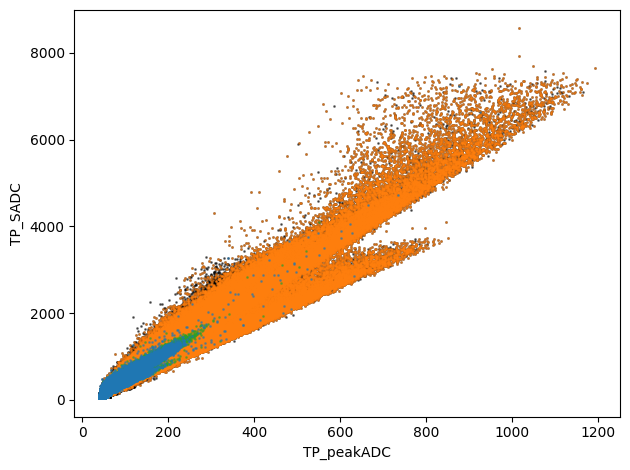

In [ ]:
cmap = plt.get_cmap("tab10")


fig, ax = plt.subplots(1,1)
tps.plot.scatter(x='TP_peakADC', y='TP_SADC', color='black', alpha=0.5, s=1, ax=ax)
tps[tps.TP_mcgen_key == 4].plot.scatter(x='TP_peakADC', y='TP_SADC', color=cmap(1), alpha=0.5, s=1, ax=ax)
tps[tps.TP_mcgen_key == 26].plot.scatter(x='TP_peakADC', y='TP_SADC', color=cmap(2), alpha=0.5, s=1, ax=ax)
tps[tps.TP_mcgen_key == 9].plot.scatter(x='TP_peakADC', y='TP_SADC', color=cmap(0), alpha=0.5, s=1, ax=ax)

fig.tight_layout()

<Axes: xlabel='TP_peakADC', ylabel='TP_TOT'>

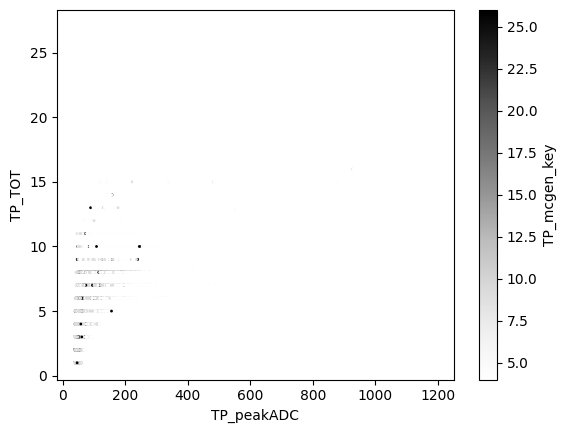

In [97]:
fig, ax = plt.subplots(1,1)

tps[tps.TP_mcgen_key.isin([4,9,26])].plot.scatter(x='TP_peakADC', y='TP_TOT', s=1, c='TP_mcgen_key', ax=ax)



In [117]:
[(i, ws.info['mc_generator_labels'][i]) for i in tps.query('(TP_TOT > 20) & (TP_signal == 1)').TP_mcgen_key.unique()]

[(np.int32(4), 'CavernwallGammasAtLAr1x8x6'),
 (np.int32(1), 'Rn222ChainBi214GenInLAr'),
 (np.int32(21), 'Th232ChainGenInCathode'),
 (np.int32(2), 'Rn222ChainFromBi214GenInUpperMesh1x8x6')]